In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('Titanic-Dataset.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.shape

(891, 12)

In [6]:
print("number of rows : ", data.shape[0])
print("number of columns : ", data.shape[1])

number of rows :  891
number of columns :  12


In [7]:
# As age has comparitively less missing values replace the null values with the median, we are not using mean due to outliers.
data['Age']=data.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x: x.fillna(x.median()))

In [8]:
data.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x: x.fillna(x.median())).head()

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0


In [9]:
data['Age'].isnull().sum()

np.int64(0)

In [10]:
#as there are too many missing in cabin column remove the column entirely.
#but before dropping, make a new column with name "deck" which will have the first letter of column "Cabin" for  null values we keep as 'U'
data['Cabin'].fillna('U')
data['Deck']=data['Cabin'].str[0]
data.drop('Cabin', axis=1, inplace=True)

In [11]:
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,NaN


In [12]:
data['Deck']=data['Deck'].fillna('U')

In [13]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,U
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,U
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,U


In [14]:
# there are 2 missing values in embarked, therefore fill them with the mode of embarked.
data['Embarked']=data['Embarked'].fillna(data['Embarked'].mode()[0])

In [15]:
#we are going extract title in the name for social class info
# we are also count the ffamily size for each passenger to check if the passenger is travelling alone or with many members as the survival chance many be reduce.
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1

In [16]:
data['Title'] = data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [17]:
#create a new column isAlone, which marks as 1 if the passenger is alone.
data['IsAlone'] = (data['FamilySize'] == 1).astype(int)

In [18]:
data['Ticket'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Ticket
Non-Null Count  Dtype 
--------------  ----- 
891 non-null    object
dtypes: object(1)
memory usage: 7.1+ KB


In [19]:
data['TicketPrefix'] = data['Ticket'].apply(lambda x: x.split()[0] if not x.isdigit() else 'None')

In [20]:
### encoding categorical variables ###

In [21]:
# mapping males as 1 and females as 0
data['Gender']=data['Sex'].map({'male' : 1, 'female' : 0})

In [22]:
data['Embarked'].nunique()

3

In [23]:
#therefore we will get 3 new columns while encoding

In [24]:
pd.get_dummies(data, columns=['Embarked'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Deck,FamilySize,Title,IsAlone,TicketPrefix,Gender,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,2,Mr,0,A/5,1,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,Mrs,0,PC,0,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,1,Miss,1,STON/O2.,0,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,2,Mrs,0,None,0,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U,1,Mr,1,None,1,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,U,1,Rev,1,None,1,False,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B,1,Miss,1,None,0,False,False,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.5,1,2,W./C. 6607,23.4500,U,4,Miss,0,W./C.,0,False,False,True
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,1,Mr,1,None,1,True,False,False


In [25]:
data1=pd.get_dummies(data, columns=['Embarked'], drop_first=True)

In [26]:
data1.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Deck,FamilySize,Title,IsAlone,TicketPrefix,Gender,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,2,Mr,0,A/5,1,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,Mrs,0,PC,0,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,1,Miss,1,STON/O2.,0,False,True


In [27]:
# similarly we encode for deck, ticketprefix and title
data1 = pd.get_dummies(data1, columns=['Deck'], drop_first=True)

In [28]:
data1['Title'].value_counts()

,count
Title,
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Col,2
Mlle,2
Major,2


In [29]:
#since we have many diff values first we only some and remaining we keep as others
title_counts=data1['Title'].value_counts()

In [30]:
rare_counts=title_counts[title_counts<10].index

In [31]:
print(rare_counts)

Index(['Dr', 'Rev', 'Col', 'Mlle', 'Major', 'Ms', 'Mme', 'Don', 'Lady', 'Sir',
       'Capt', 'Countess', 'Jonkheer'],
      dtype='object', name='Title')


In [32]:
data1['Title']=data1['Title'].replace(rare_counts, 'Rare')

In [33]:
data1=pd.get_dummies(data1, columns=['Title'], drop_first=True)

In [34]:
data1.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_U,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,...,False,False,False,False,False,True,False,True,False,False


In [35]:
data1['TicketPrefix'].value_counts()

,count
TicketPrefix,
None,661
PC,60
C.A.,27
STON/O,12
A/5,10
W./C.,9
SOTON/O.Q.,8
CA.,8
A/5.,7


In [36]:
data1['TicketPrefix'].isna().sum()

np.int64(0)

In [37]:
prefix_counts = data1['TicketPrefix'].value_counts()
rare_prefixes = prefix_counts[prefix_counts < 5].index

data1['TicketPrefix'] = data1['TicketPrefix'].replace(rare_prefixes, 'Rare')

In [38]:
data1 = pd.get_dummies(data1, columns=['TicketPrefix'], drop_first=True)

In [39]:
# we will divide age groups into bins.
bins = [0, 12, 18, 30, 50, 100]
labels = ['Child', 'Teen', 'YoungAdult', 'Adult', 'Senior']
data1['AgeGroup'] = pd.cut(data1['Age'], bins=bins, labels=labels)

In [40]:
data1['AgeGroup']

,AgeGroup
0,YoungAdult
1,Adult
2,YoungAdult
3,Adult
4,Adult
...,...
886,YoungAdult
887,YoungAdult
888,YoungAdult
889,YoungAdult


In [41]:
data1 = pd.get_dummies(data1, columns=['AgeGroup'], drop_first=True)

In [42]:
#we do minimax normalization for "Fare" column values...
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data1[['Fare']] = scaler.fit_transform(data1[['Fare']])


In [43]:
# for finding out the outliers we do the IQR quantification..
Q1 = data1['Age'].quantile(0.25)
Q3 = data1['Age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find actual outliers
age_outliers = data1[(data1['Age'] < lower_bound) | (data1['Age'] > upper_bound)]

In [44]:
print(type(age_outliers))

<class 'pandas.core.frame.DataFrame'>


In [45]:
#Till here we are not removing the age outliers as they may  be useful for some classifications as infant and old people  have high chance of survival..

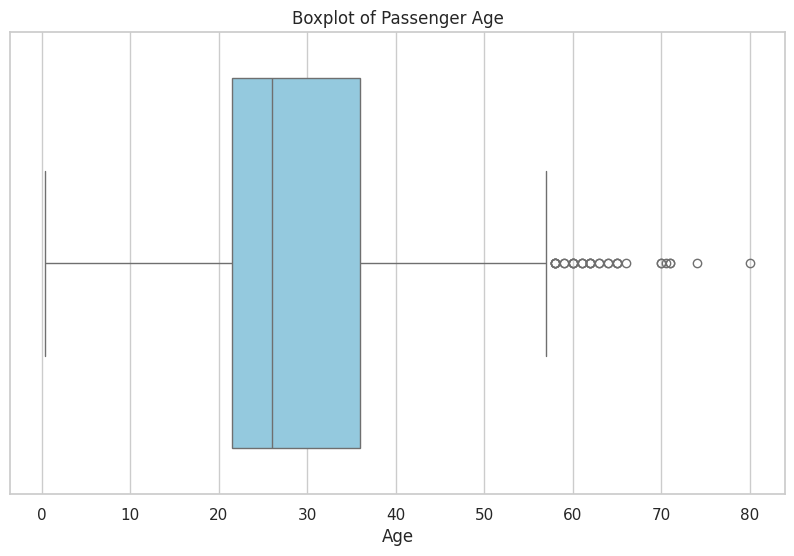

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for prettier visuals
sns.set(style="whitegrid")

# Plot boxplot for Age
plt.figure(figsize=(10, 6))
sns.boxplot(data=data1, x='Age', color='skyblue')

# Add title
plt.title('Boxplot of Passenger Age')
plt.xlabel('Age')

# Show plot
plt.show()


In [47]:
print(data1.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'FamilySize', 'IsAlone', 'Gender',
       'Embarked_Q', 'Embarked_S', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E',
       'Deck_F', 'Deck_G', 'Deck_T', 'Deck_U', 'Title_Miss', 'Title_Mr',
       'Title_Mrs', 'Title_Rare', 'TicketPrefix_A/5.', 'TicketPrefix_C',
       'TicketPrefix_C.A.', 'TicketPrefix_CA', 'TicketPrefix_CA.',
       'TicketPrefix_F.C.C.', 'TicketPrefix_None', 'TicketPrefix_PC',
       'TicketPrefix_Rare', 'TicketPrefix_S.O.C.', 'TicketPrefix_SC/PARIS',
       'TicketPrefix_SOTON/O.Q.', 'TicketPrefix_SOTON/OQ',
       'TicketPrefix_STON/O', 'TicketPrefix_STON/O2.', 'TicketPrefix_W./C.',
       'AgeGroup_Teen', 'AgeGroup_YoungAdult', 'AgeGroup_Adult',
       'AgeGroup_Senior'],
      dtype='object')


In [48]:
data1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Gender
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.112424,0.523008,0.381594,0.062858,1.904602,0.602694,0.647587
std,257.353842,0.486592,0.836071,13.304424,1.102743,0.806057,0.096995,1.613459,0.489615,0.477990
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,21.500000,0.000000,0.000000,0.015440,1.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,0.028213,1.000000,1.000000,1.000000
75%,668.500000,1.000000,3.000000,36.000000,1.000000,0.000000,0.060508,2.000000,1.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,1.000000,11.000000,1.000000,1.000000


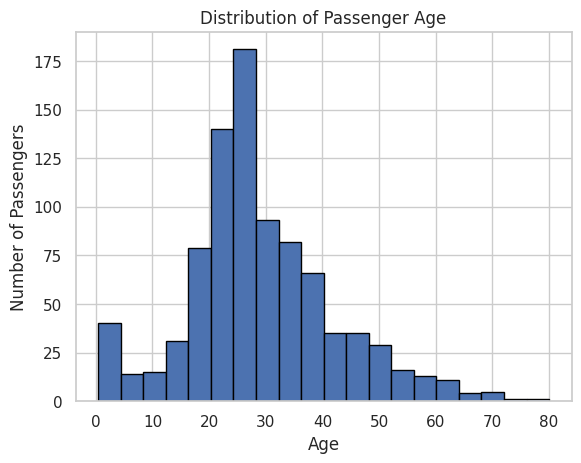

In [49]:
plt.hist(data['Age'], bins=20, edgecolor='black')
plt.title('Distribution of Passenger Age')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.show()

In [50]:
numeric_col = data.select_dtypes(include=['int64','float64']).columns
continuous_cols = [col for col in numeric_col if data[col].nunique() > 10]

In [51]:
print(numeric_col)

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'FamilySize', 'IsAlone', 'Gender'],
      dtype='object')


In [52]:
print(continuous_cols)

['PassengerId', 'Age', 'Fare']


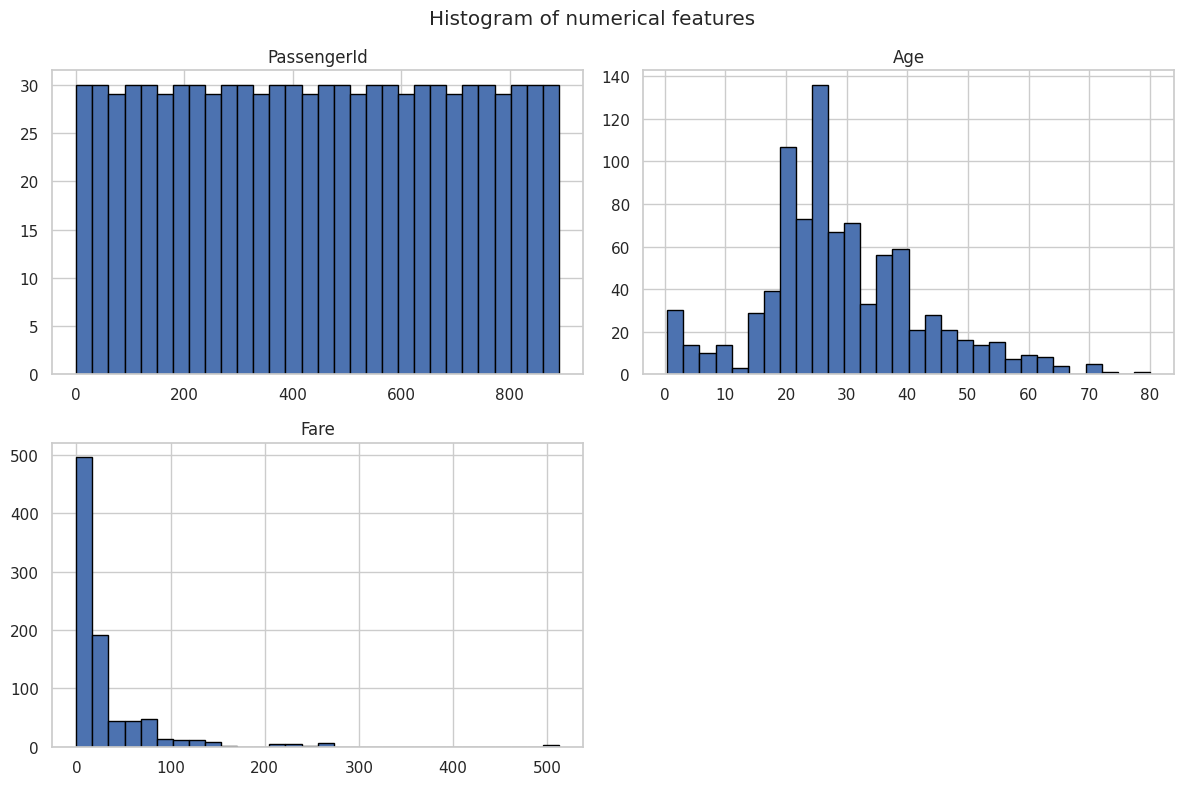

In [53]:
data[continuous_cols].hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle('Histogram of numerical features')
plt.tight_layout()
plt.show()

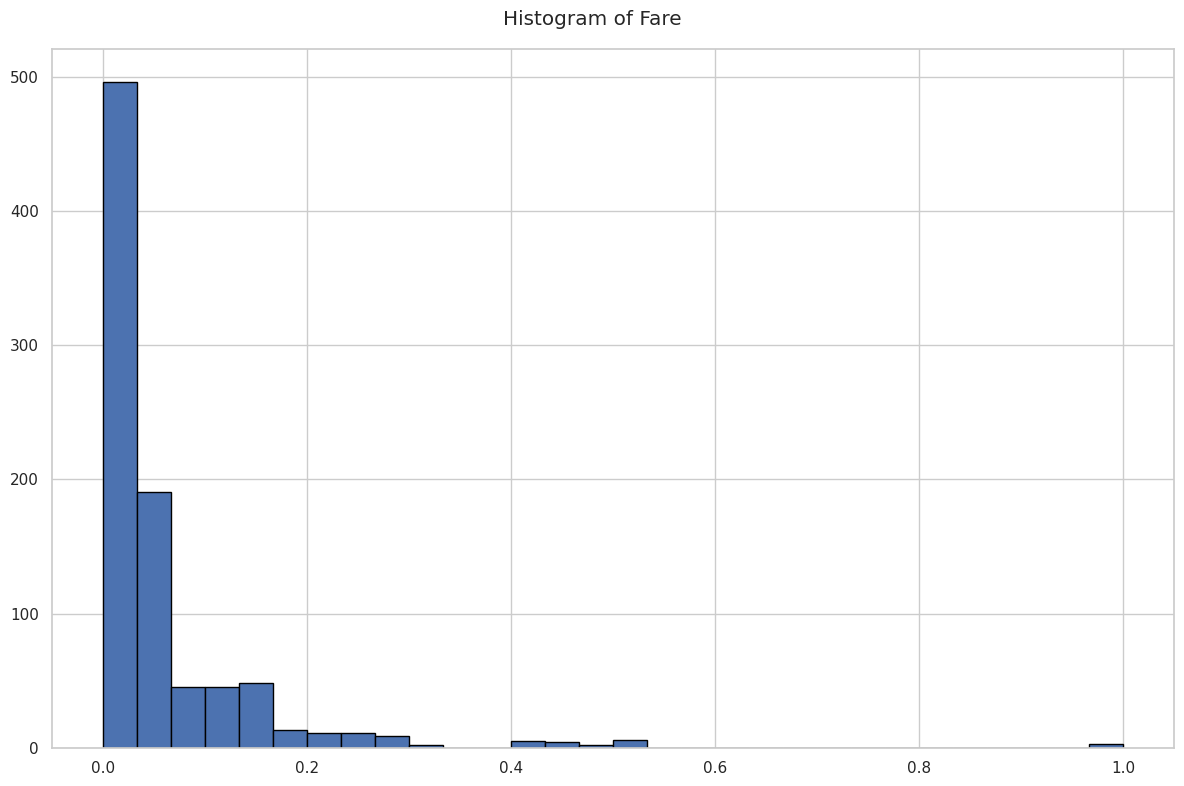

In [54]:
data1['Fare'].hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle('Histogram of Fare')
plt.tight_layout()
plt.show()

In [55]:
#apply log tranformation to reduce disparities
data1['Fare_log']=np.log1p(data1['Fare'])

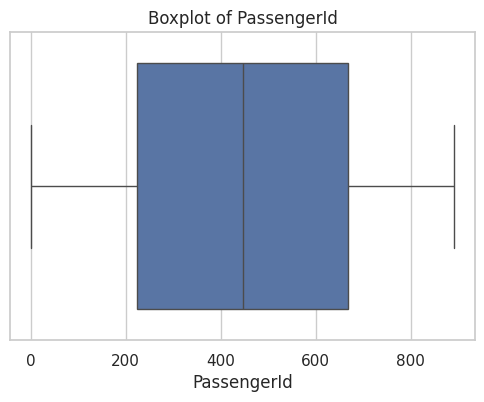

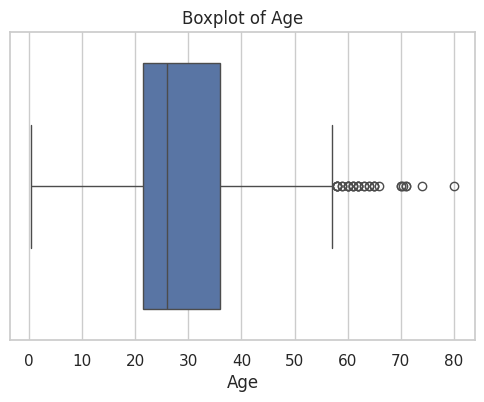

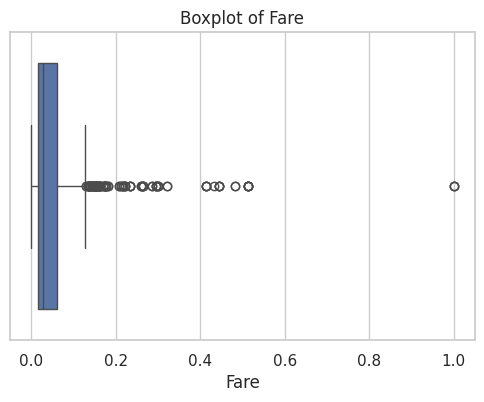

In [56]:
for col in continuous_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=data1[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

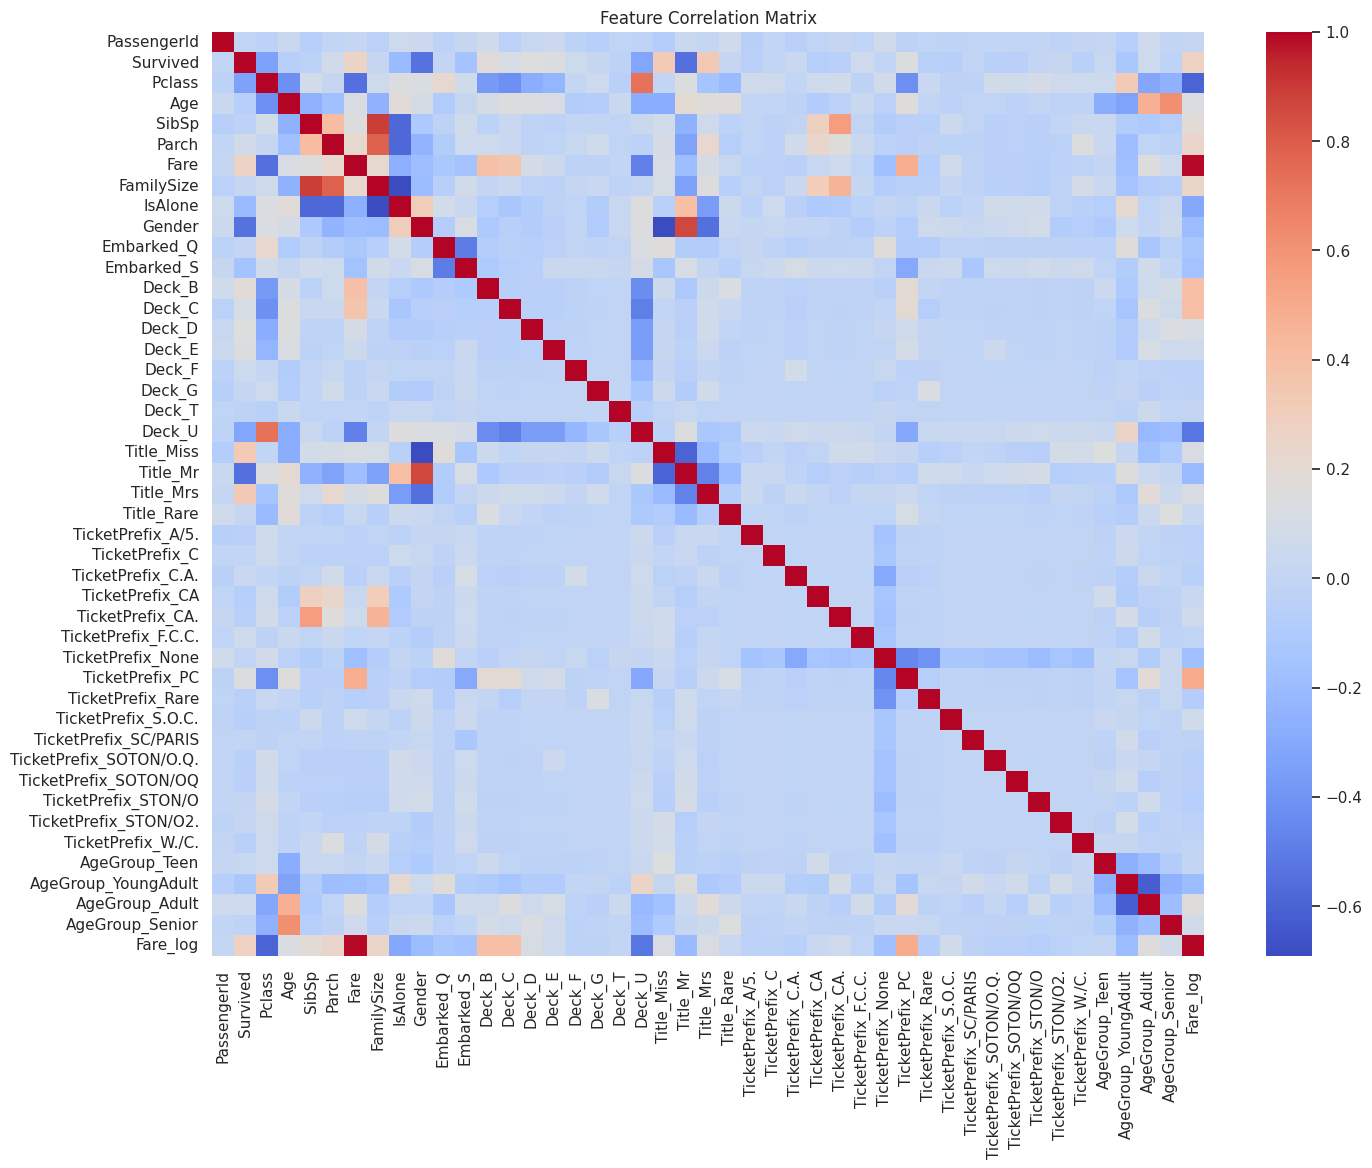

In [61]:
# plotting the correlation matrix
corr = data1.corr(numeric_only=True)
plt.figure(figsize=(16,12))
# plotting heatmap
sns.heatmap(corr, annot=False,cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

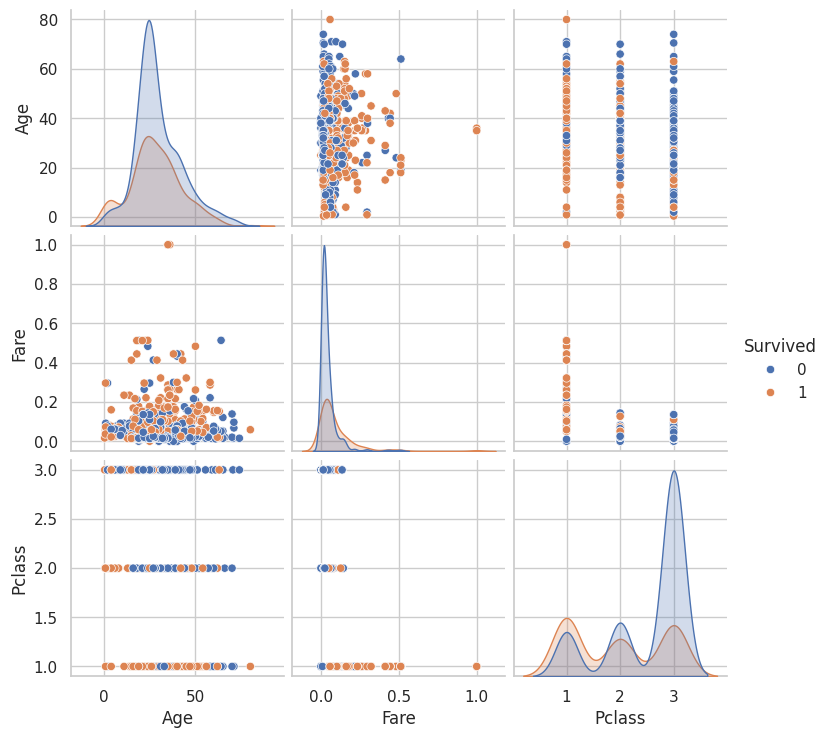

In [71]:
# generating pair plots
sns.pairplot(data1[['Age', 'Fare', 'Pclass', 'Survived']], hue='Survived')
plt.show()